### 1. Importing the libraries and the data

In [2]:
import pandas as pd # Pandas (version : 1.1.5) 
import numpy as np # Numpy (version : 1.19.2)
import matplotlib.pyplot as plt # Matplotlib (version :  3.3.2)
from sklearn.cluster import KMeans # Scikit Learn (version : 0.23.2)
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn-v0_8-darkgrid')

---

### 2. Importing the data from .csv file

First we read the data from the dataset using `read_csv` from the pandas library. 

In [3]:
data = pd.read_csv('data/shopping_behavior_updated.csv')


Viewing the data that we imported to pandas dataframe object

In [4]:
data

,CustomerID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


---

### 3. Viewing and Describing the data

In [5]:
data.shape

(3900, 18)

Viewing Column names of the dataset using `columns`

In [6]:
for i,col in enumerate(data.columns):
    print(f'Column number {1+i} is {col}')

Column number 1 is CustomerID
Column number 2 is Age
Column number 3 is Gender
Column number 4 is Item Purchased
Column number 5 is Category
Column number 6 is Purchase Amount (USD)
Column number 7 is Location
Column number 8 is Size
Column number 9 is Color
Column number 10 is Season
Column number 11 is Review Rating
Column number 12 is Subscription Status
Column number 13 is Shipping Type
Column number 14 is Discount Applied
Column number 15 is Promo Code Used
Column number 16 is Previous Purchases
Column number 17 is Payment Method
Column number 18 is Frequency of Purchases


View datatypes of each column in the dataset using `dtype`.

In [7]:
data.dtypes

CustomerID                  int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

Gathering Further information about the dataset using `info()`

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Describing the data as basic statistics using `describe()`

In [9]:
data.describe()

,CustomerID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### 4. Checking the data for inconsistencies and further cleaning the data if needed.

Checking data for missing values using `isnull()`.

In [10]:
data.isnull()

,CustomerID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Checking summary of missing values

In [11]:
data.isnull().sum()

CustomerID                0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [12]:
for i, col in enumerate(data.columns):
    if data[col].dtype == 'object':  # Chỉ lấy các cột có kiểu object
        print(f'Column number {i+1} is {col}')


Column number 3 is Gender
Column number 4 is Item Purchased
Column number 5 is Category
Column number 7 is Location
Column number 8 is Size
Column number 9 is Color
Column number 10 is Season
Column number 12 is Subscription Status
Column number 13 is Shipping Type
Column number 14 is Discount Applied
Column number 15 is Promo Code Used
Column number 17 is Payment Method
Column number 18 is Frequency of Purchases


In [13]:
for i, col in enumerate(data.columns):
    if data[col].dtype == 'object':  # Chỉ lấy các cột có kiểu object
        unique_count = data[col].nunique()  # Số lượng giá trị duy nhất
        print(f'Column number {i+1} is "{col}" with {unique_count} unique values')

        # Hiển thị số lần xuất hiện của từng giá trị
        print(data[col].value_counts(), "\n" + "-"*50)


Column number 3 is "Gender" with 2 unique values
Gender
Male      2652
Female    1248
Name: count, dtype: int64 
--------------------------------------------------
Column number 4 is "Item Purchased" with 25 unique values
Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64 
--------------------------------------------------
Column number 5 is "Category" with 4 unique values
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64 
--------------------------------------------------
Column number 7 i

In [14]:
from sklearn.preprocessing import LabelEncoder

for col in data.columns:
    if data[col].dtype == 'object':  # Chỉ áp dụng cho cột object
        unique_values = data[col].nunique()  # Đếm số lượng giá trị duy nhất
        
        le = LabelEncoder()  
        data[col] = le.fit_transform(data[col])  # Ánh xạ giá trị thành số
        
        print(f'Column "{col}" has {unique_values} unique values and has been encoded.')

Column "Gender" has 2 unique values and has been encoded.
Column "Item Purchased" has 25 unique values and has been encoded.
Column "Category" has 4 unique values and has been encoded.
Column "Location" has 50 unique values and has been encoded.
Column "Size" has 4 unique values and has been encoded.
Column "Color" has 25 unique values and has been encoded.
Column "Season" has 4 unique values and has been encoded.
Column "Subscription Status" has 2 unique values and has been encoded.
Column "Shipping Type" has 6 unique values and has been encoded.
Column "Discount Applied" has 2 unique values and has been encoded.
Column "Promo Code Used" has 2 unique values and has been encoded.
Column "Payment Method" has 6 unique values and has been encoded.
Column "Frequency of Purchases" has 7 unique values and has been encoded.


In [15]:
data

,CustomerID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
1,2,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
2,3,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
3,4,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
4,5,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,9,1,28,45,0,21,2,4.2,0,0,0,0,32,5,6
3896,3897,52,0,0,0,49,14,0,23,1,4.5,0,5,0,0,41,0,1
3897,3898,46,0,1,0,33,29,0,8,1,2.9,0,4,0,0,24,5,5
3898,3899,44,0,17,2,77,22,2,3,2,3.8,0,1,0,0,24,5,6


Deleting 'customer_id' colummn using `drop()`.

In [16]:
data = data.drop('CustomerID', axis=1)
data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
1,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
2,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
3,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
4,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0


The 'Annual income' and 'Spending score' columns have spaces in their column names, we need to rename them.

Cleaning the data labels (Annual income and Spending Score) using `rename()`.

In [17]:
data = data.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
1,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
2,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
3,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
4,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0


NOTE : Data doesnt have any missing values so it is clean, and therefore no need for cleaning the data

### 5. Understanding and Visualizing Data

Finding and viewing Corelations in the data and columns using `corr()`.

In [18]:
corr = data.corr()
corr

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Age,1.000000,0.002763,-0.000636,0.003546,-0.010424,-0.001957,-0.023654,0.006700,-0.028418,-0.021949,0.006492,-0.010743,0.004366,0.004366,0.040445,-0.005215,0.017406
Gender,0.002763,1.000000,0.001921,-0.004144,-0.014044,0.000747,0.018764,-0.000560,0.016258,0.008164,0.417197,0.016490,0.595823,0.595823,0.035873,0.003369,0.012829
Item Purchased,-0.000636,0.001921,1.000000,0.052951,-0.005342,0.020390,-0.008942,0.027241,0.012755,-0.004621,0.003028,0.016244,-0.013983,-0.013983,-0.001513,-0.006695,0.015249
Category,0.003546,-0.004144,0.052951,1.000000,-0.017841,0.000541,-0.035916,0.009119,0.000141,-0.000299,0.011022,-0.009031,0.000572,0.000572,-0.015669,-0.000776,0.012190
Purchase Amount (USD),-0.010424,-0.014044,-0.005342,-0.017841,1.000000,0.028803,0.027805,-0.004326,-0.018358,0.030776,-0.006996,-0.024637,-0.017798,-0.017798,0.008063,-0.009077,-0.017219
Location,-0.001957,0.000747,0.020390,0.000541,0.028803,1.000000,0.000275,-0.004944,0.012259,-0.004222,0.004529,-0.001458,0.011926,0.011926,-0.032962,-0.006931,-0.012740
Size,-0.023654,0.018764,-0.008942,-0.035916,0.027805,0.000275,1.000000,-0.005124,-0.009286,0.027603,-0.014501,0.001020,-0.001804,-0.001804,-0.011152,-0.033220,-0.008860
Color,0.006700,-0.000560,0.027241,0.009119,-0.004326,-0.004944,-0.005124,1.000000,-0.000109,0.027356,0.021333,-0.000034,0.019394,0.019394,0.000418,-0.007578,-0.009938
Season,-0.028418,0.016258,0.012755,0.000141,-0.018358,0.012259,-0.009286,-0.000109,1.000000,0.000160,-0.005139,0.019122,0.015550,0.015550,0.024333,-0.005520,0.009568
Review Rating,-0.021949,0.008164,-0.004621,-0.000299,0.030776,-0.004222,0.027603,0.027356,0.000160,1.000000,-0.006368,-0.009787,-0.012486,-0.012486,0.004229,0.014404,0.005643


Plotting the heatmap of correlation of all the columns of the dataset.

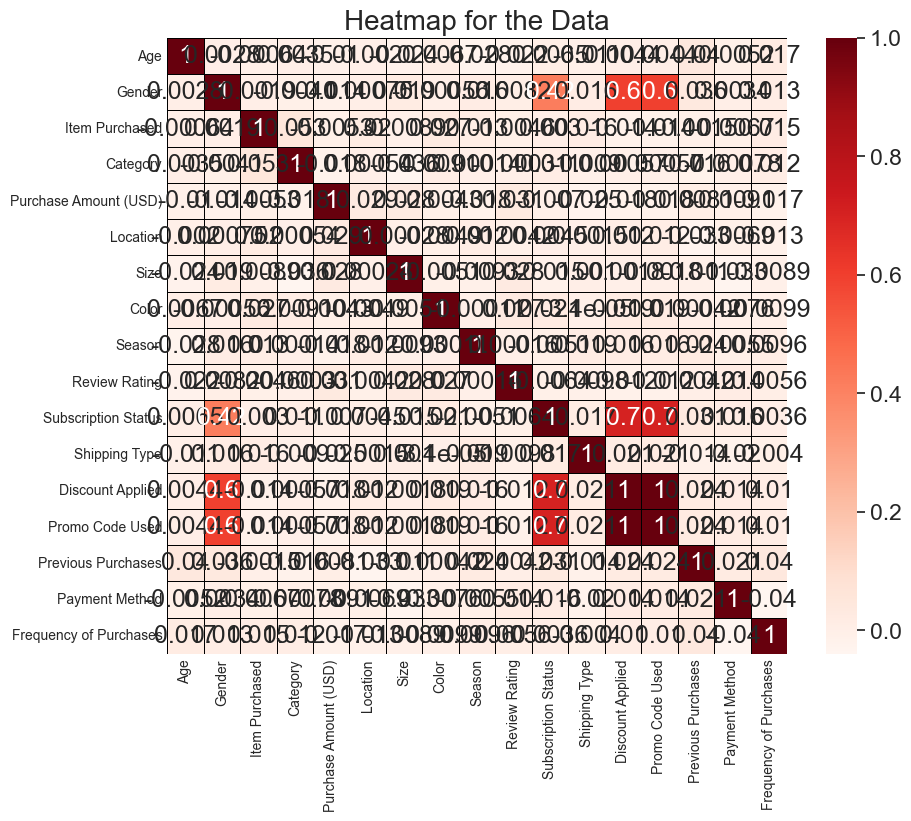

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

#### 5.1. Gender Data Visualization

First we take a look at the gender column of the dataset.

In [20]:
data['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

Now we take a look at the data type of the column.

In [21]:
data['Gender'].dtype

dtype('int64')

Finding the unique values in the column using `unique()`.

In [22]:
data['Gender'].unique()

array([1, 0])

Counts of each type in the Gender Column using `value_counts()`.

In [23]:
data['Gender'].value_counts()

Gender
1    2652
0    1248
Name: count, dtype: int64

Plotting Gender Distribution on Bar graph and the ratio of distribution using Pie Chart.

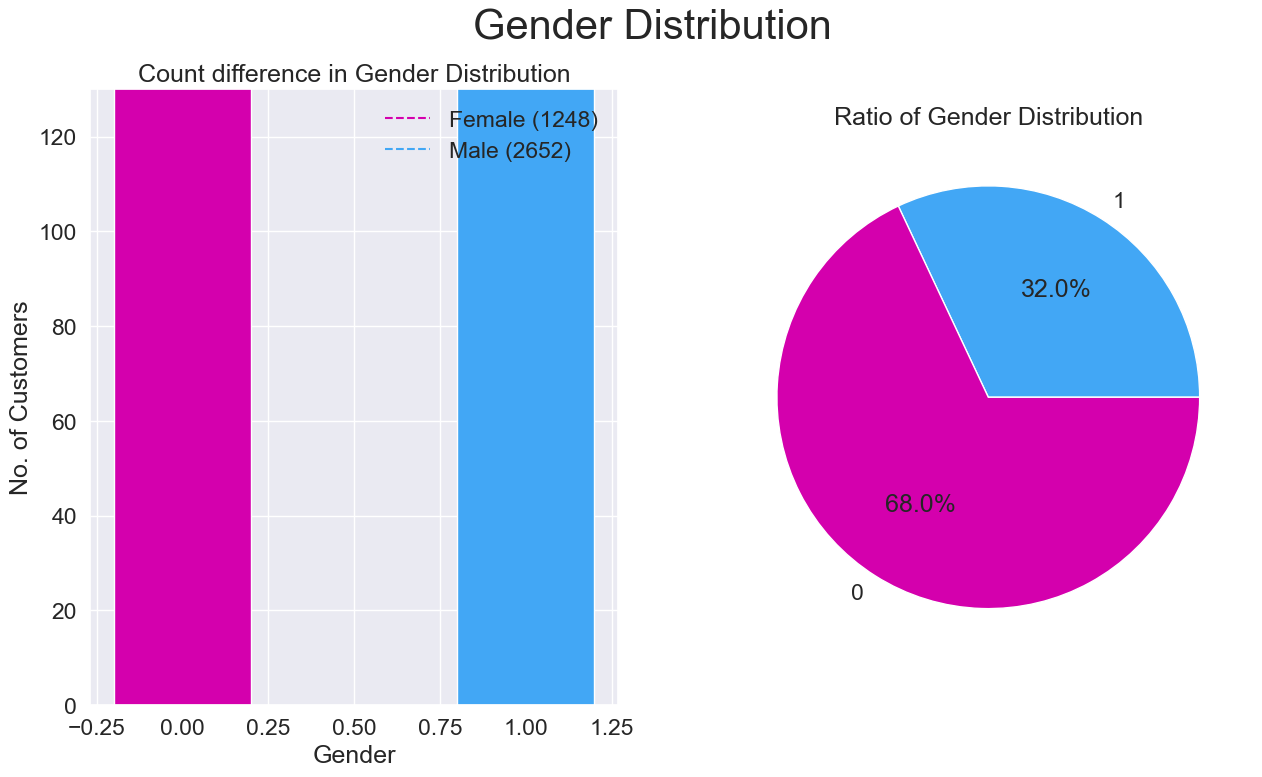

In [24]:
labels=data['Gender'].unique()
values=data['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['#42a7f5','#d400ad'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=data['Gender'].value_counts()[0], color='#d400ad', linestyle='--', label=f'Female ({data.Gender.value_counts()[0]})')
ax0.axhline(y=data['Gender'].value_counts()[1], color='#42a7f5', linestyle='--', label=f'Male ({data.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['#42a7f5','#d400ad'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=30);
plt.show()

#### 5.2. Age Data Visualization

First we take a look at the age column of the dataset.

In [25]:
data['Age'].head()

0    55
1    19
2    50
3    21
4    45
Name: Age, dtype: int64

Now the Data type of the column.

In [26]:
data['Age'].dtype

dtype('int64')

Finding the unique values in the column.

In [27]:
data['Age'].unique()

array([55, 19, 50, 21, 45, 46, 63, 27, 26, 57, 53, 30, 61, 65, 64, 25, 52,
       66, 31, 56, 18, 38, 54, 33, 36, 35, 29, 70, 69, 67, 20, 39, 42, 68,
       49, 59, 47, 40, 41, 48, 22, 24, 44, 37, 58, 32, 62, 51, 28, 43, 34,
       23, 60])

Statistical Description of the Age column.

In [28]:
data['Age'].describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

Visualizing Statistical Description of the Age on a boxplot.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5060\3887709188.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({data.Age.describe()[6]:.2f})')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5060\3887709188.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({data.Age.describe()[6]:.2f})')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5060\3887709188.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version

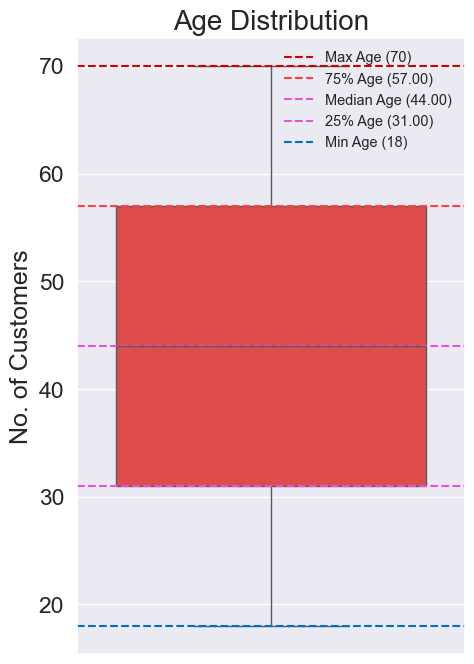

In [29]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Age"], color="#f73434")
ax.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data.Age.max()})')
ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({data.Age.describe()[6]:.2f})')
ax.axhline(y=data['Age'].median(), linestyle='--',color='#eb50db', label=f'Median Age ({data.Age.median():.2f})')
ax.axhline(y=data['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({data.Age.describe()[4]:.2f})')
ax.axhline(y=data['Age'].min(), linestyle='--',color='#046ebf', label=f'Min Age ({data.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

Counts of first five max age in the Age Column.

In [30]:
data['Age'].value_counts().head()

Age
69    88
57    87
41    86
25    85
49    84
Name: count, dtype: int64

Visualizing Age Distribution using a countplot.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5060\86286687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['Age'], palette='spring')


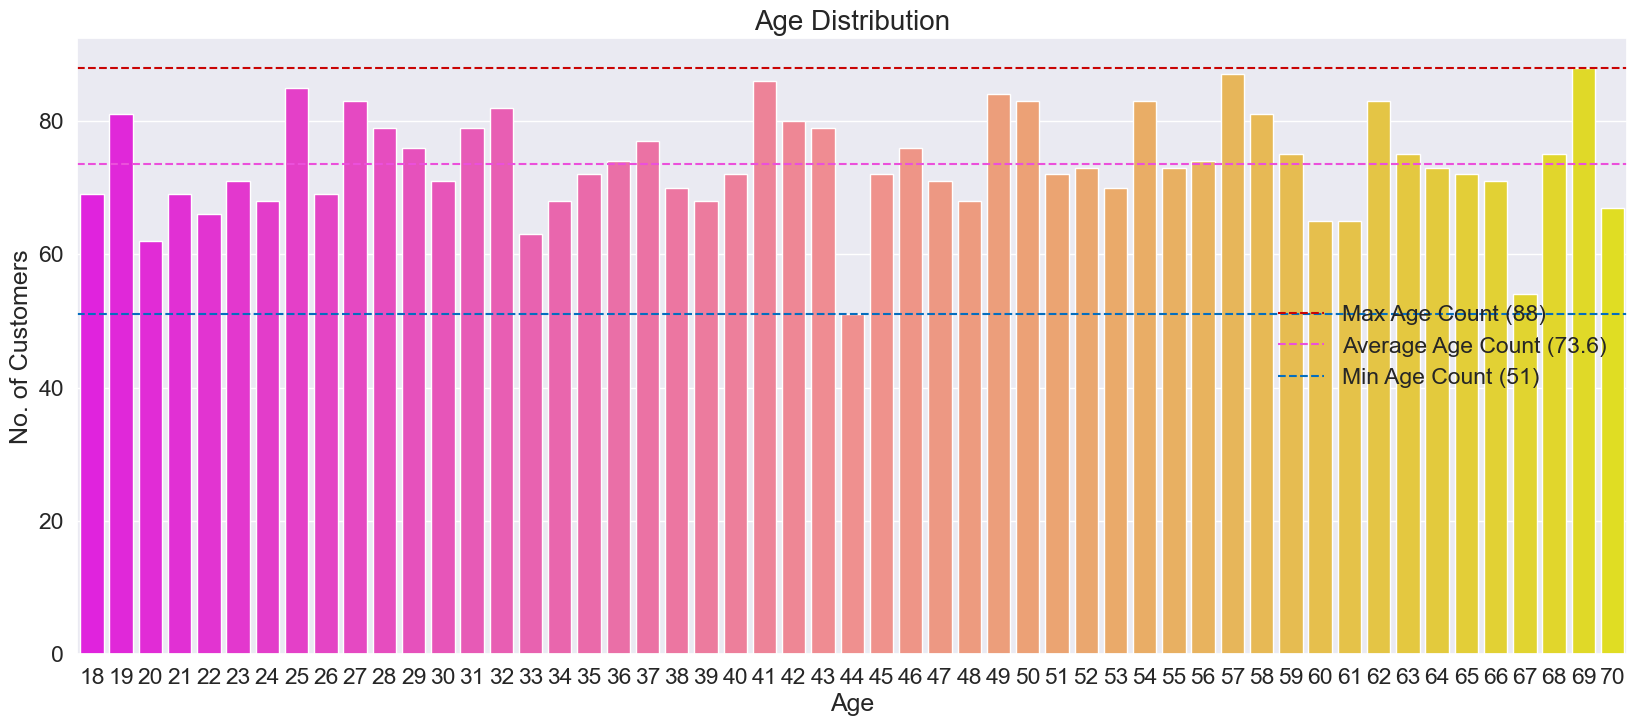

In [31]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data['Age'], palette='spring')
ax.axhline(y=data['Age'].value_counts().max(), linestyle='--',color='#c90404', label=f'Max Age Count ({data.Age.value_counts().max()})')
ax.axhline(y=data['Age'].value_counts().mean(), linestyle='--',color='#eb50db', label=f'Average Age Count ({data.Age.value_counts().mean():.1f})')
ax.axhline(y=data['Age'].value_counts().min(), linestyle='--',color='#046ebf', label=f'Min Age Count ({data.Age.value_counts().min()})')
ax.legend(loc ='right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

###### Gender wise Age Distribution

Statistical Age Distribution of Male customers.

In [32]:
data[data['Gender']=='Male']['Age'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Age, dtype: float64

Statistical Age Distribution of female customers.

In [33]:
data[data['Gender']=='Female']['Age'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Age, dtype: float64

Visualizing Gender wise Age Distribution of Male and Female customers on a boxplot.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5060\1899645145.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax0.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data_male[7]})')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5060\1899645145.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax0.axhline(y=data_male[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_male[6]:.2f})')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5060\1899645145.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as la

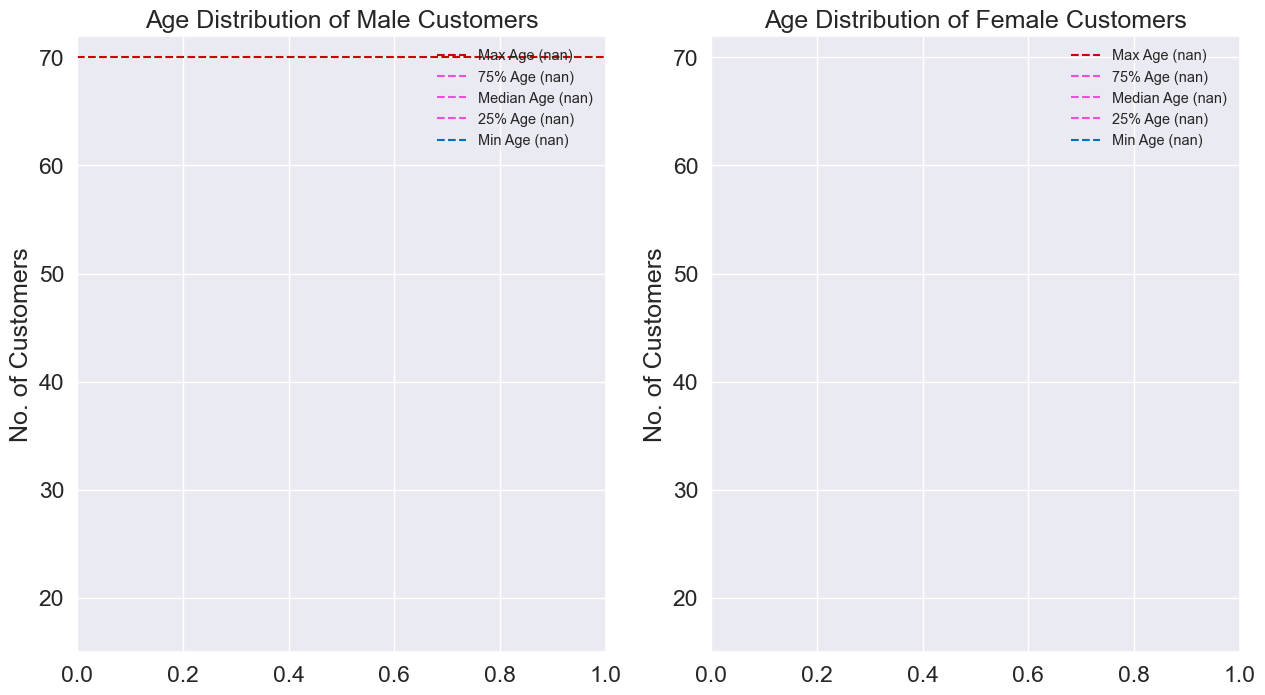

In [34]:
data_male = data[data['Gender']=='Male']['Age'].describe()
data_female = data[data['Gender']=='Female']['Age'].describe()

fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(y=data[data['Gender']=='Male']['Age'], color="#42a7f5", ax=ax0)
ax0.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data_male[7]})')
ax0.axhline(y=data_male[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_male[6]:.2f})')
ax0.axhline(y=data_male[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_male[5]:.2f})')
ax0.axhline(y=data_male[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_male[4]:.2f})')
ax0.axhline(y=data_male[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_male[3]})')
ax0.legend(fontsize='xx-small', loc='upper right')
ax0.set(ylabel='No. of Customers', title='Age Distribution of Male Customers')
ax0.set_ylim(15,72)

ax1 = sns.boxplot(y=data[data['Gender']=='Female']['Age'], color="#d400ad", ax=ax1)
ax1.axhline(y=data_female[7], linestyle='--',color='#c90404', label=f'Max Age ({data_female[7]})')
ax1.axhline(y=data_female[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_female[6]:.2f})')
ax1.axhline(y=data_female[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_female[5]:.2f})')
ax1.axhline(y=data_female[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_female[4]:.2f})')
ax1.axhline(y=data_female[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_female[3]})')
ax1.legend(fontsize='xx-small', loc='upper right')
ax1.set(ylabel='No. of Customers', title='Age Distribution of Female Customers')
ax1.set_ylim(15,72)

plt.show()

Average Age of Male Customers.

In [35]:
data[data['Gender']=='Male'].Age.mean()

nan

Counts of first five max age counts in the Male Customers.

In [36]:
data[data['Gender']=='Male'].Age.value_counts().head()

Series([], Name: count, dtype: int64)

Visualizing distribution of age count in Male customers using a countplot.

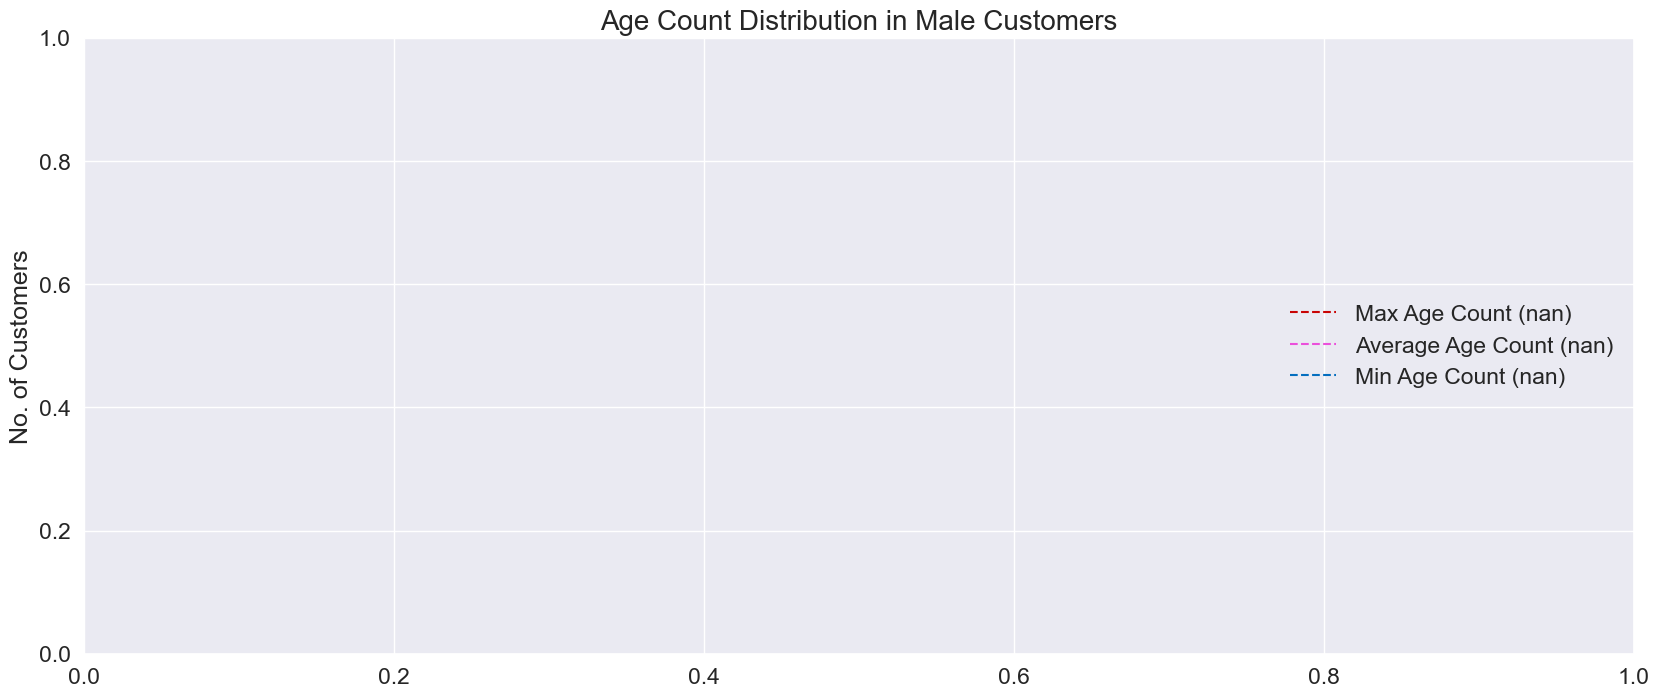

In [37]:
maxi = data[data['Gender']=='Male'].Age.value_counts().max()
mean = data[data['Gender']=='Male'].Age.value_counts().mean()
mini = data[data['Gender']=='Male'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data[data['Gender']=='Male'].Age, palette='spring')

ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')

ax.legend(loc ='right')

plt.title('Age Count Distribution in Male Customers', fontsize = 20)
plt.show()

Average Age of Female Customers.

In [38]:
data[data['Gender']=='Female'].Age.mean()

nan

Counts of first five max age count in the Female Customers.

In [39]:
data[data['Gender']=='Female'].Age.value_counts().head()

Series([], Name: count, dtype: int64)

Visualizing distribution of age count in Female customers using a countplot.

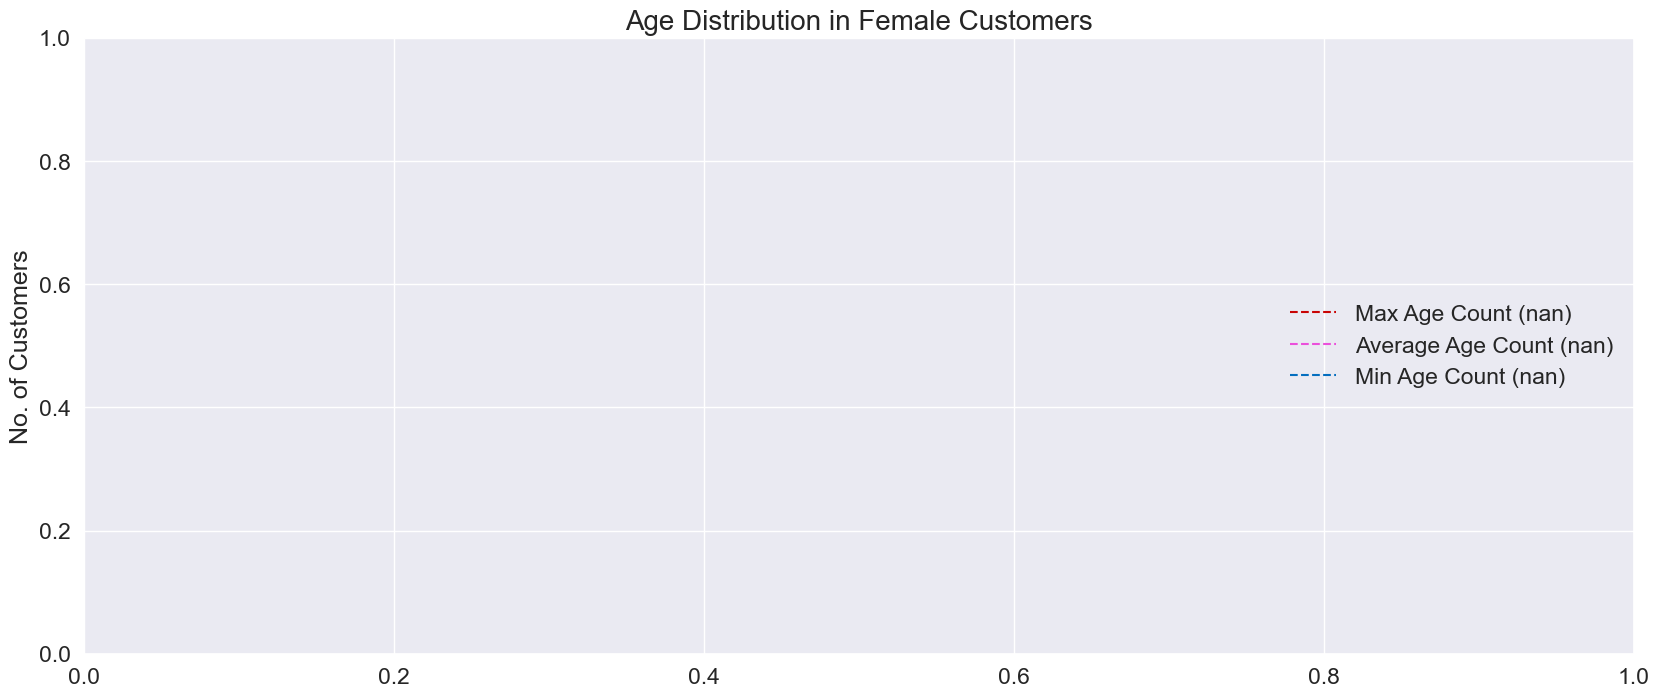

In [40]:
maxi = data[data['Gender']=='Female'].Age.value_counts().max()
mean = data[data['Gender']=='Female'].Age.value_counts().mean()
mini = data[data['Gender']=='Female'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data[data['Gender']=='Female'].Age, palette='spring')
ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')
ax.legend(loc ='right')

plt.title('Age Distribution in Female Customers', fontsize = 20)
plt.show()

### 6. Analyzing Data  for Modelling

#### 6.1. Analyzing Annual Income data

First we look at the 'Annual Income' column.

In [41]:
data['Annual_Income'].head()

KeyError: 'Annual_Income'

Data type of Annual Income Column.

In [ ]:
data['Annual_Income'].dtype

dtype('int64')

Statistical data about Annual Income column.

In [ ]:
data['Annual_Income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

Visualizing statistical data about Annual Income column on a boxplot.

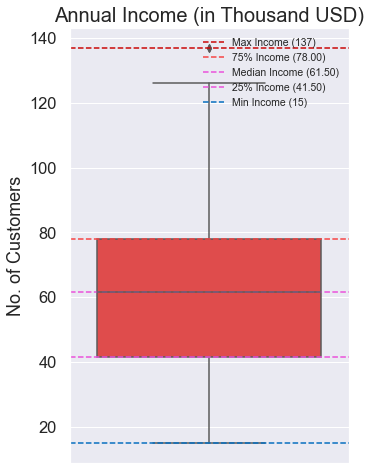

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Annual_Income"], color="#f73434")
ax.axhline(y=data["Annual_Income"].max(), linestyle='--',color='#c90404', label=f'Max Income ({data.Annual_Income.max()})')
ax.axhline(y=data["Annual_Income"].describe()[6], linestyle='--',color='#f74343', label=f'75% Income ({data.Annual_Income.describe()[6]:.2f})')
ax.axhline(y=data["Annual_Income"].median(), linestyle='--',color='#eb50db', label=f'Median Income ({data.Annual_Income.median():.2f})')
ax.axhline(y=data["Annual_Income"].describe()[4], linestyle='--',color='#eb50db', label=f'25% Income ({data.Annual_Income.describe()[4]:.2f})')
ax.axhline(y=data["Annual_Income"].min(), linestyle='--',color='#046ebf', label=f'Min Income ({data.Annual_Income.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Annual Income (in Thousand USD)', fontsize = 20)
plt.show()

Distribution of Annual Income counts.

In [ ]:
data['Annual_Income'].value_counts().head()

54    12
78    12
60     6
87     6
62     6
Name: Annual_Income, dtype: int64

Visualizing Annual Income count value distribution on a histogram.

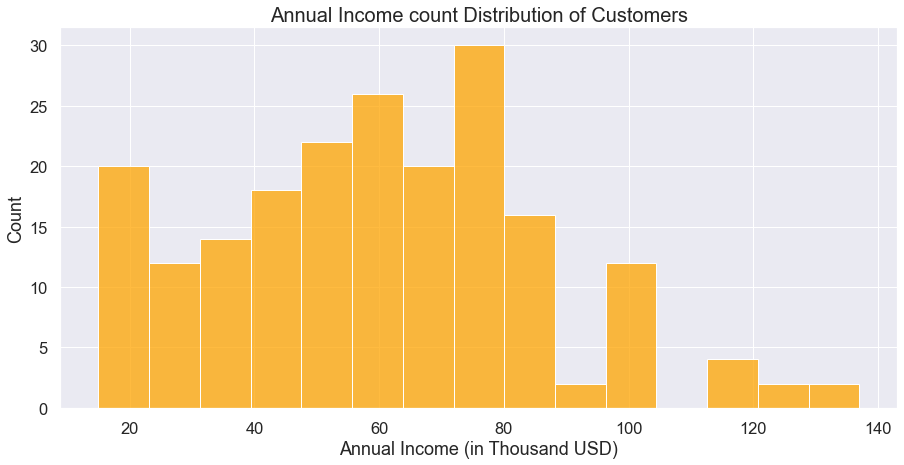

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.histplot(data['Annual_Income'], bins=15, ax=ax, color=['orange'])
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Annual Income count Distribution of Customers', fontsize = 20)
plt.show()

Visualizing Annual Income per Age on a Scatterplot.

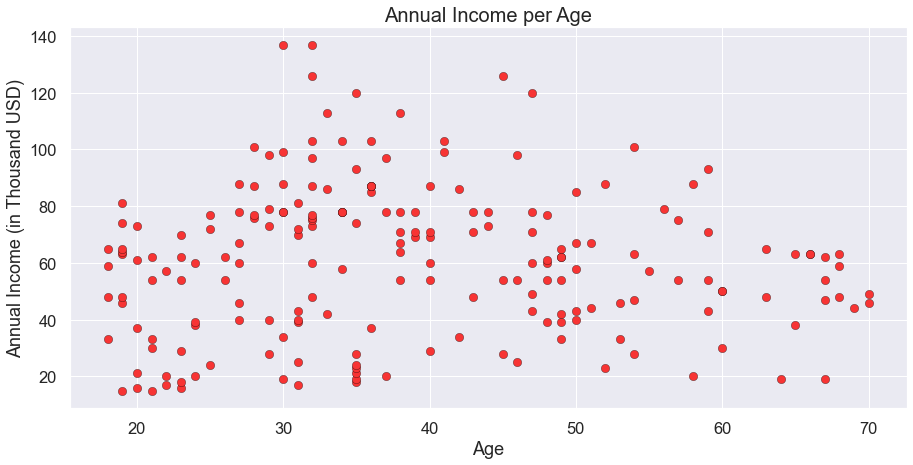

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], color='#f73434', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income per Age', fontsize = 20)
plt.show()

###### Annual Income per Gender.

Statistical data about the Annual Income of male customer.

In [ ]:
data[data['Gender']=='Male'].Annual_Income.describe()

count     88.000000
mean      62.227273
std       26.638373
min       15.000000
25%       45.500000
50%       62.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

Statistical data about the Annual Income of female customer.

In [ ]:
data[data['Gender']=='Female'].Annual_Income.describe()

count    112.000000
mean      59.250000
std       26.011952
min       16.000000
25%       39.750000
50%       60.000000
75%       77.250000
max      126.000000
Name: Annual_Income, dtype: float64

Visualizing statistical difference of Annual Income between Male and Female Customers.

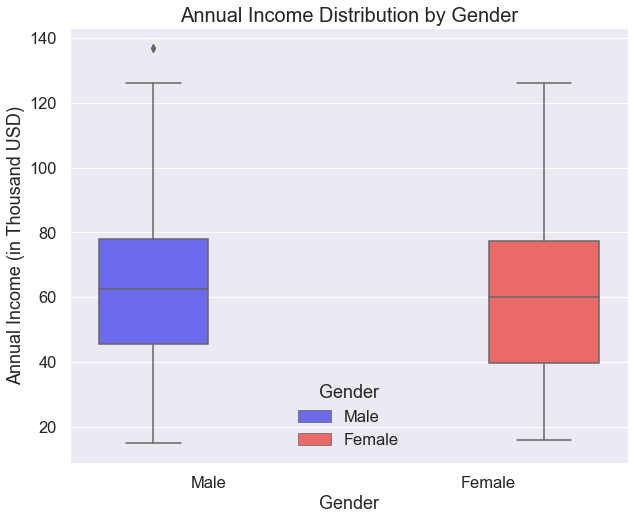

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Annual_Income"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

Visualizing annual Income per Age by Gender on a scatterplot.

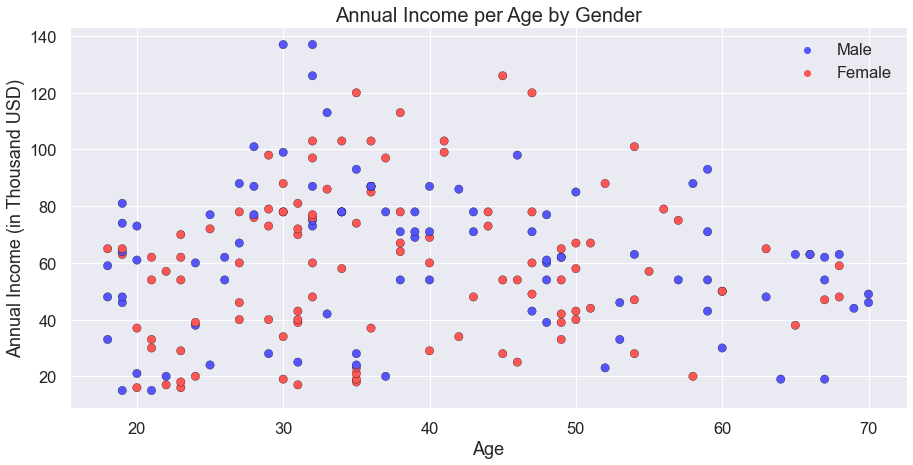

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')
ax.legend(loc ='upper right')

plt.title('Annual Income per Age by Gender', fontsize = 20)
plt.show()

Visualizing difference of Annual Income between Male and Female Customers using Violin Plot.

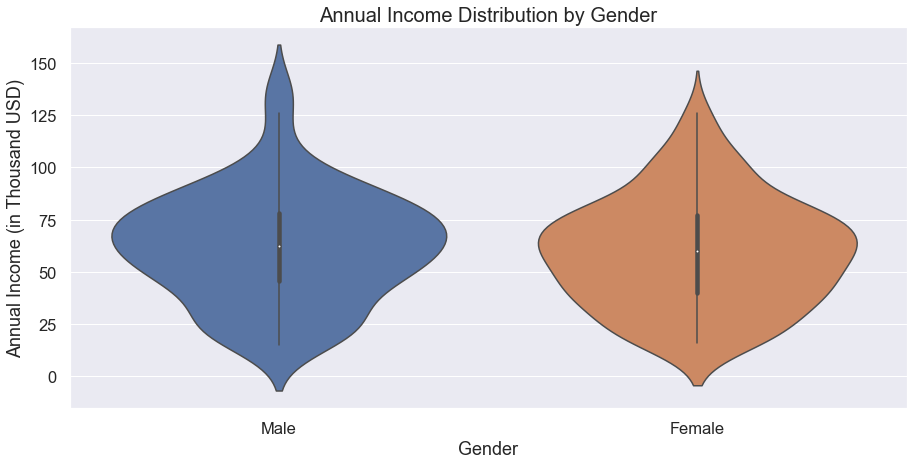

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=data['Annual_Income'],x=data['Gender'])
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

#### 6.2. Analyzing Spending Score data

First we look at the Spending Score column.

In [ ]:
data['Spending_Score'].head()

0    39
1    81
2     6
3    77
4    40
Name: Spending_Score, dtype: int64

Data type of Spending score column.

In [ ]:
data['Spending_Score'].dtype

dtype('int64')

Statistical Data of Spending Scores Column.

In [ ]:
data['Spending_Score'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending_Score, dtype: float64

Visualizing statistical data about Spending score column on a boxplot.

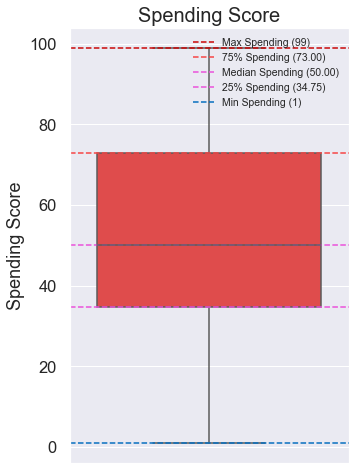

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data['Spending_Score'], color="#f73434")
ax.axhline(y=data['Spending_Score'].max(), linestyle='--',color='#c90404', label=f'Max Spending ({data.Spending_Score.max()})')
ax.axhline(y=data['Spending_Score'].describe()[6], linestyle='--',color='#f74343', label=f'75% Spending ({data.Spending_Score.describe()[6]:.2f})')
ax.axhline(y=data['Spending_Score'].median(), linestyle='--',color='#eb50db', label=f'Median Spending ({data.Spending_Score.median():.2f})')
ax.axhline(y=data['Spending_Score'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Spending ({data.Spending_Score.describe()[4]:.2f})')
ax.axhline(y=data['Spending_Score'].min(), linestyle='--',color='#046ebf', label=f'Min Spending ({data.Spending_Score.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('Spending Score')

plt.title('Spending Score', fontsize = 20)
plt.show()

Visualizing Spending Scores per Age on a scatterplot.

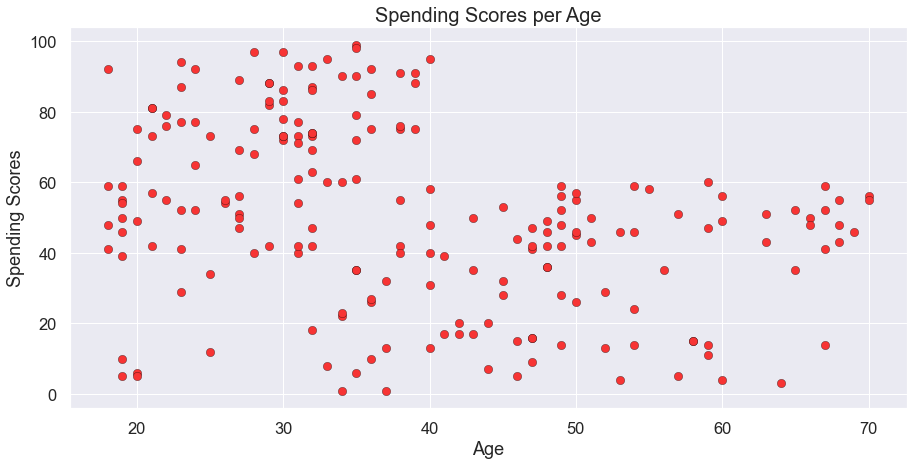

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')

plt.title('Spending Scores per Age', fontsize = 20)
plt.show()

###### Spending Scores per Gender

Statistical data of Spending Score of male customer.

In [ ]:
data[data['Gender']=='Male'].Annual_Income.describe()

count     88.000000
mean      62.227273
std       26.638373
min       15.000000
25%       45.500000
50%       62.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

Statistical data of Spending Score of female customer.

In [ ]:
data[data['Gender']=='Female'].Annual_Income.describe()

count    112.000000
mean      59.250000
std       26.011952
min       16.000000
25%       39.750000
50%       60.000000
75%       77.250000
max      126.000000
Name: Annual_Income, dtype: float64

Visualizing statistical difference of Spending Score between Male and Female Customers.

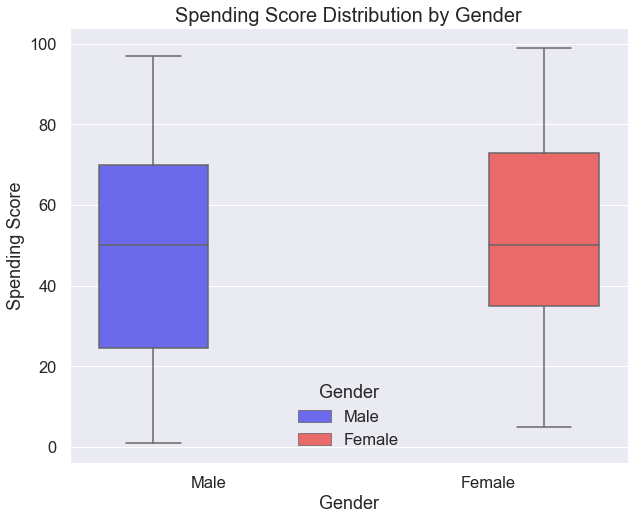

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Spending_Score"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Spending Score')

plt.title('Spending Score Distribution by Gender', fontsize = 20)
plt.show()

Visualizing Spending Score per Age by Gender on a scatterplot.

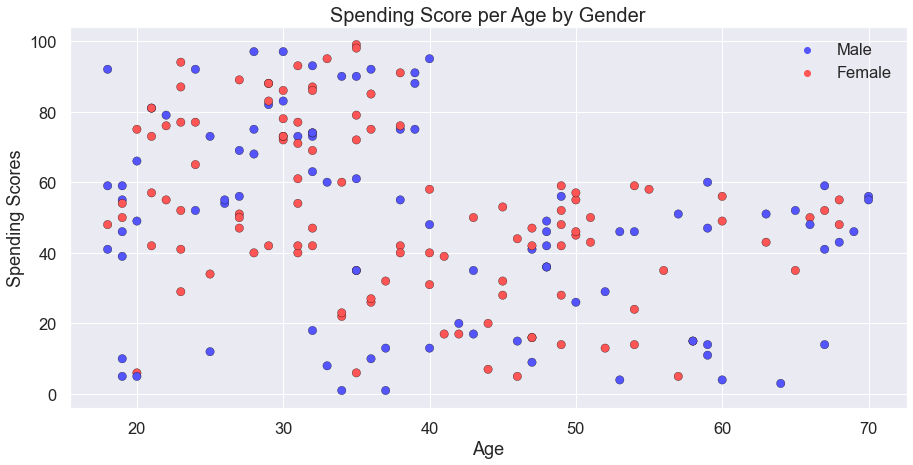

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.legend(loc ='upper right')

plt.title('Spending Score per Age by Gender', fontsize = 20)
plt.show()

Visualizing difference of Spending Score between Male and Female Customers using Violin Plot.

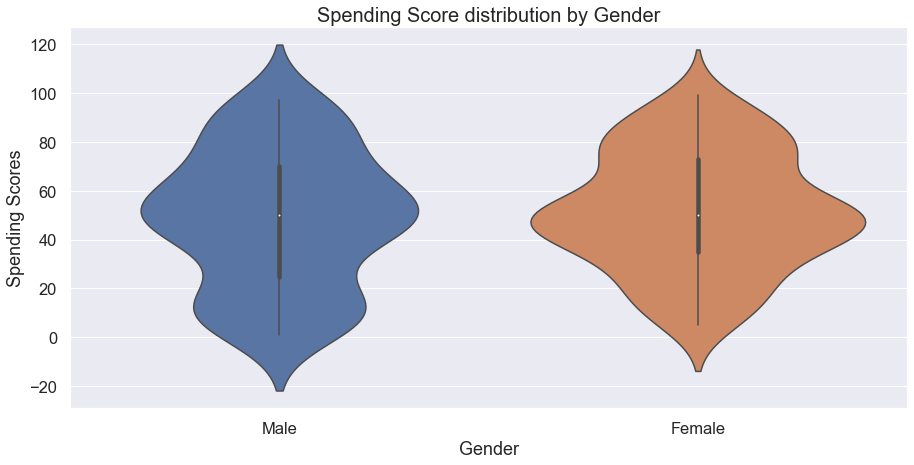

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=data['Spending_Score'],x=data['Gender'])
ax.set_ylabel('Spending Scores')

plt.title('Spending Score distribution by Gender', fontsize = 20)
plt.show()

#### K - Means Clustering

K-means clustering is a clustering algorithm that aims to partition n observations into k clusters. Initialisation – K initial “means” (centroids) are generated at random Assignment – K clusters are created by associating each observation with the nearest centroid Update – The centroid of the clusters becomes the new mean, Assignment and Update are repeated iteratively until convergence The end result is that the sum of squared errors is minimised between points and their respective centroids. We will use KMeans Clustering. At first we will find the optimal clusters based on inertia and using elbow method. The distance between the centroids and the data points should be less.

First we need to check the data for any missing values as it can ruin our model.

In [ ]:
data.isna().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

We conclude that we don't have any missing values therefore we can go forward and start the clustering procedure.

We will now view and select the data that we need for clustering.

In [ ]:
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
clustering_data = data.iloc[:,[2,3]]
clustering_data.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Now, we need to visualize the data which we are going to use for the clustering.
This will give us a fair idea about the data we're working on.

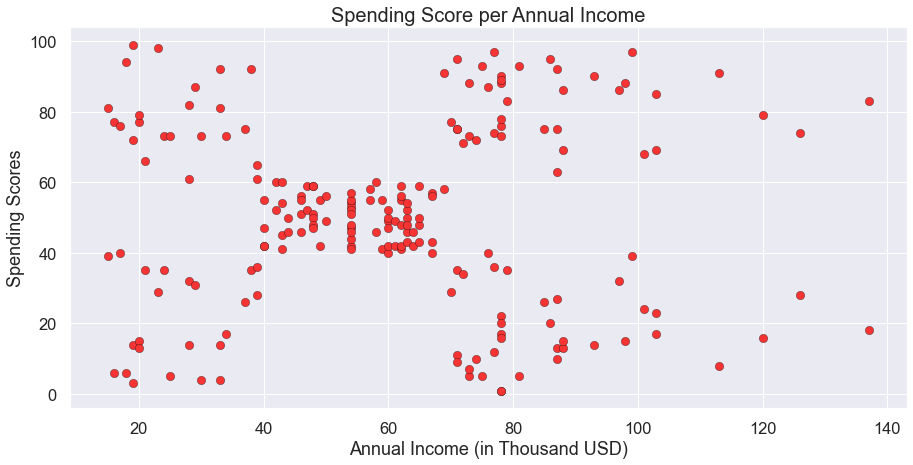

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=clustering_data['Spending_Score'],x=clustering_data['Annual_Income'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Spending Score per Annual Income', fontsize = 20)
plt.show()

This gives us a fair Idea and patterns about some of the data. 

### 7. Determining No. of Clusters Required

**The Elbow Method**

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.

![formula](images\formula.png)

where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

With this simple line of code we get all the inertia value or the within the cluster sum of square.

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([269981.28      , 183653.32894737, 106348.37306211,  73679.78903949,
        44448.45544793,  37239.83554246,  30259.65720729,  25044.96776402,
        21809.92756262,  20080.72737315,  17595.28888109,  15838.71778551,
        14466.53979354,  13292.9619591 ,  12052.29051796,  10975.43968751,
        10353.92884199,   9519.57272727,   8699.12889474,   8337.69955649,
         7796.52027073,   7191.56623034,   6864.65268343,   6382.56445028,
         6196.22832047,   5835.0424812 ,   5425.45253518,   5171.30772006,
         4948.08448218])

Inertia can be recognized as a measure of how internally coherent clusters are.

Now, we visualize the Elbow Method so that we can determine the number of optimal clusters for our dataset.

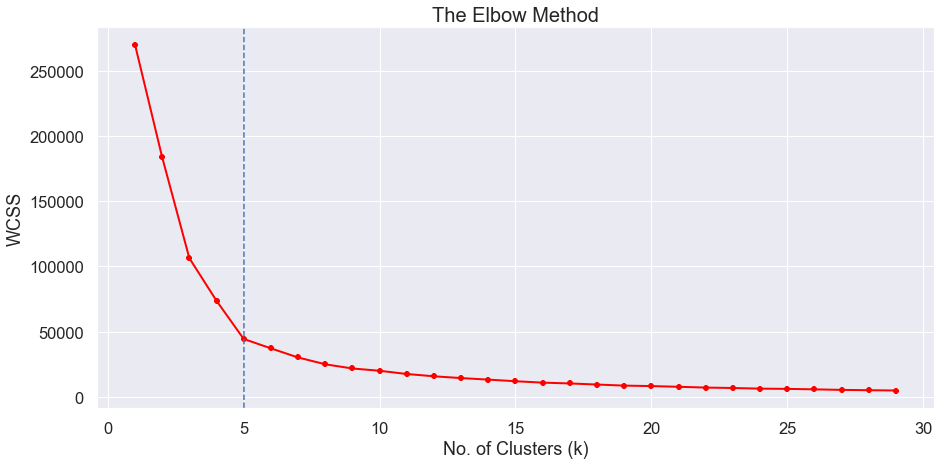

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

It is clear, that the optimal number of clusters for our data are 5, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 5, it would be difficult to visualize the elbow if we choose the higher range.

### 8. Clustering

Now we will build the model for creating clusters from the dataset.
We will use `n_clusters = 5` i.e. 5 clusters as we have determined by the elbow method, which would be optimal for our dataset.

Our data set is for  unsupervised learning therefore we will use `fit_predict()`
Suppose we were working with  supervised learning data set we would use `fit_tranform()`

In [ ]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(clustering_data)

KMeans(n_clusters=5)

Now that we have the clusters created, we will enter them into a different column

In [ ]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

,Annual_Income,Spending_Score,Cluster_Prediction
0,15,39,0
1,15,81,2
2,16,6,0
3,16,77,2
4,17,40,0


We can also get the centroids of the clusters by the `cluster_centers_` attribute of KMeans algorithm.

In [ ]:
kms.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571]])

Now we have all the data we need, we just need to plot the data. We will plot the data using scatterplot which will allow us to observe different clusters in different colours.

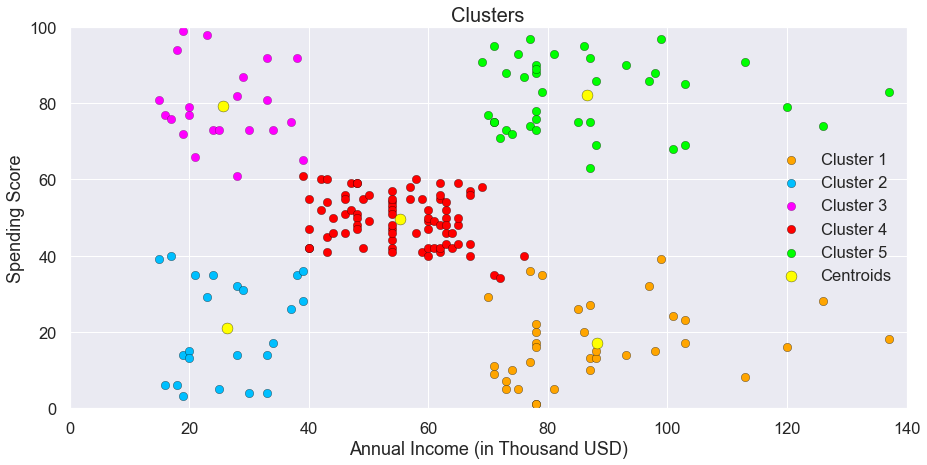

In [ ]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()

### 9. Analysis

Analyzing Data using the above graph becomes much more easier as it gives us a visual aid for better understanding of the 
data.
Kmeans has divided the dataset into 5 clusters based on Annual income and the spending scores of the individual customers.
The following clusters are created by the model, 
1. Cluster Orange
1. Cluster Blue
1. Cluster Purple
1. Cluster Red
1. Cluster Green

Visualizing all the clusters Seperately will provide us more insights.

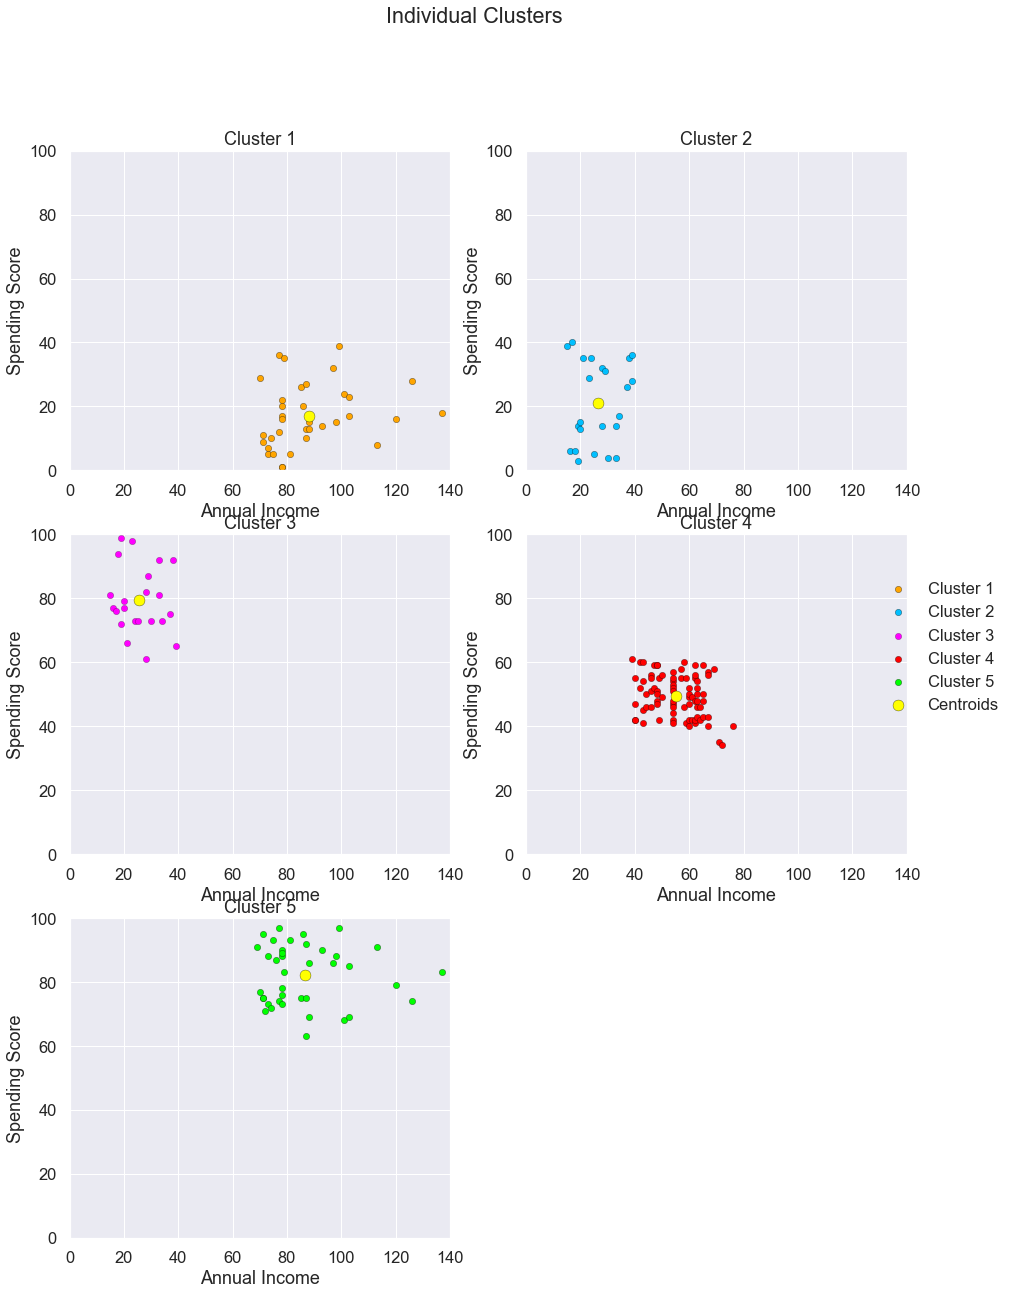

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
ax[0,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')
ax[0,0].scatter(x=kms.cluster_centers_[4,0], y=kms.cluster_centers_[4,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 1')

ax[0,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')
ax[0,1].scatter(x=kms.cluster_centers_[0,0], y=kms.cluster_centers_[0,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 2')

ax[1,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')
ax[1,0].scatter(x=kms.cluster_centers_[2,0], y=kms.cluster_centers_[2,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 3')

ax[1,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')
ax[1,1].scatter(x=kms.cluster_centers_[1,0], y=kms.cluster_centers_[1,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 4')

ax[2,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')
ax[2,0].scatter(x=kms.cluster_centers_[3,0], y=kms.cluster_centers_[3,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3, label='Centroids')
ax[2,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 5')

fig.delaxes(ax[2,1])
fig.legend(loc='right')
fig.suptitle('Individual Clusters')
plt.show()

1. **Cluster Orange - Balanced Customers :**

    They earn less and spend less. We can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.
<br>
1. **Cluster Blue - Pinch Penny Customers :**

    Earning high and spending less. We see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.
<br>
1. **Cluster Purple - Normal Customer :**

    Customers are average in terms of earning and spending An Average consumer in terms of spending and Annual Income we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.
    <br>
1. **Cluster Red - Spenders :**

    This type of customers earns less but spends more Annual Income is less but spending high, so can also be treated as potential target customer we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.
    <br>
1. **Cluster Green - Target Customers :**

    Earning high and also spending high Target Customers. Annual Income High as well as Spending Score is high, so a target consumer. we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.